**Executive summary**

Monthly revenue exhibits a clear growth phase from late 2016 to late 2017, followed by a stabilization period consistent with business maturity. Decomposing revenue into order volume and Average Order Value (AOV) shows that AOV remains largely constant over time, indicating that revenue dynamics are primarily driven by changes in order frequency rather than customer spending per order. An unusually low AOV observed in December 2016 is identified as an outlier using the IQR method but is retained, as it reflects early platform adoption rather than data quality issues. Overall, the results suggest a transition from rapid expansion to steady-state operation, motivating further analysis of customer behavior and repeat purchasing patterns.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

We start the analysis by observing monthly revenue

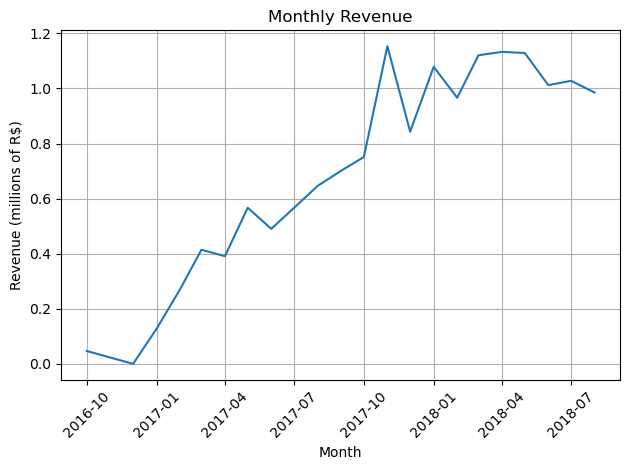

In [3]:
# Define the relative path to the directory containing derived datasets
# Using a variable makes it easier to change paths consistently across the notebook
path = './../data/derived/'

# Load monthly revenue data from CSV into a pandas DataFrame
df = pd.read_csv(path + 'monthly_revenue.csv')

# Construct a proper datetime column from separate year and month columns
# The day is set to 1 to represent each month as a single time point
# This enables correct time-series plotting and chronological ordering
df['date'] = pd.to_datetime(
    dict(year=df.year, month=df.month, day=1))

# Plot monthly revenue over time
# Revenue is scaled to millions of Brazilian reais for readability
plt.plot(df['date'], df['monthly_revenue'] / 1e6)

# Adjusts graph for readibility
plt.grid()
plt.xlabel('Month')
plt.ylabel('Revenue (millions of R$)')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall, the graph shows an increasing trend in monthly revenue. A closer inspection reveals two distinct periods. From October 2016 to November 2017, revenue grows rapidly, indicating a strong expansion phase. From November 2017 onward, revenue stabilizes around a higher level, suggesting a transition toward business maturity. Short-term fluctuations in this period may reflect seasonal effects rather than sustained growth, motivating further analysis of customer behavior and revenue drivers.

Since revenue is a function of both order volume and order value, the observed stabilization in monthly revenue motivates an analysis of monthly Average Order Value (AOV) to assess whether customer spending per order has also plateaued or if revenue trends are primarily driven by changes in order frequency.

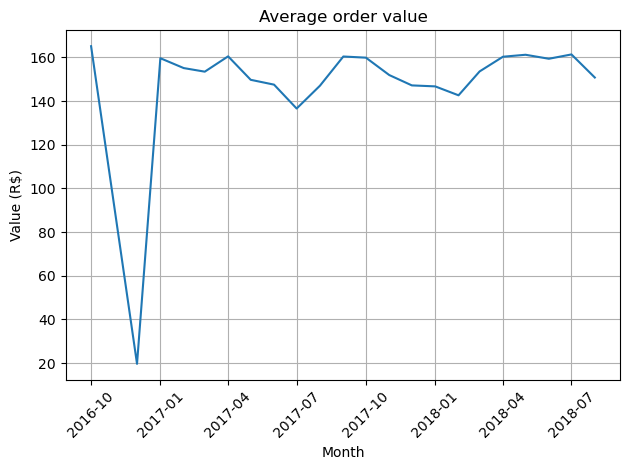

In [3]:
df = pd.read_csv(path + 'monthly_AOV.csv')

df['date'] = pd.to_datetime(
    dict(year=df.year, month=df.month, day=1))


plt.plot(df['date'], df['monthly_average_order_value'])
plt.grid()
plt.xlabel('Month')
plt.ylabel('Value (R$)')
plt.title('Average order value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows that AOV remains approximately constant over time, suggesting that variations in revenue are primarily driven by changes in order volume rather than changes in spending per order. However, the value for December 2016 is noticeably lower than the others, indicating it may be an outlier.

The interquartile range (IQR) method was used to identify potential outliers in monthly AOV because it is a robust, non-parametric approach that does not rely on distributional assumptions. Since monthly AOV values are largely stable over time and the sample size is limited, methods based on normality (such as z-scores or parametric outlier tests) are not appropriate. The IQR method is resistant to the influence of extreme values and is well suited for detecting isolated deviations in aggregated business metrics, making it an appropriate choice for evaluating whether the unusually low AOV observed in December 2016 constitutes an outlier.

In [4]:
Q1 = df['monthly_average_order_value'].quantile(0.25)
Q3 = df['monthly_average_order_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['is_outlier'] = (
    (df['monthly_average_order_value'] < lower_bound) |
    (df['monthly_average_order_value'] > upper_bound))

print("Lower bound ", lower_bound)
print("Upper bound ", upper_bound)
print("Outliers: \n", df[df['is_outlier']])

Lower bound  127.85789187500004
Upper bound  179.615246875
Outliers: 
    year  month  monthly_average_order_value       date  is_outlier
1  2016     12                        19.62 2016-12-01        True


The IQR method identifies December 2016 as an outlier in monthly AOV; however, the data point was retained in the analysis. As this month corresponds to an early stage of platform activity with substantially lower order volume, the deviation likely reflects structural effects rather than data errors. Consequently, December 2016 is treated as a meaningful observation and is only excluded in robustness checks where noted.

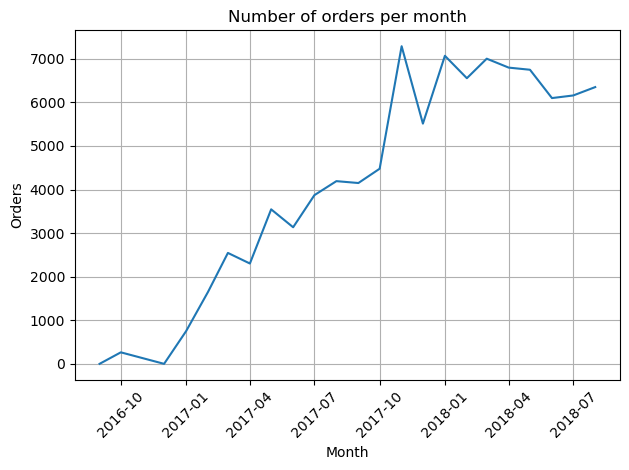

In [5]:
df = pd.read_csv(path + 'monthly_orders.csv')

df['date'] = pd.to_datetime(
    dict(year=df.year, month=df.month, day=1))


plt.plot(df['date'], df['number_of_orders'])
plt.grid()
plt.xlabel('Month')
plt.ylabel('Orders')
plt.title('Number of orders per month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The monthly order volume exhibits a pattern similar to that of total revenue, further supporting the conclusion that revenue is primarily driven by order frequency, while the average order value remains relatively stable. Additionally, the data reflect weak early platform adoption: September and December 2016 each record only a single order, November 2016 contains no observations, and the September 2016 order lacks associated payment information. These early observations should therefore not be interpreted as representative of steady-state platform behavior.